# Import

## Imports des librairies

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

## Imports des données

In [2]:
df = pd.read_csv("ds_salaries.csv")

In [3]:
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


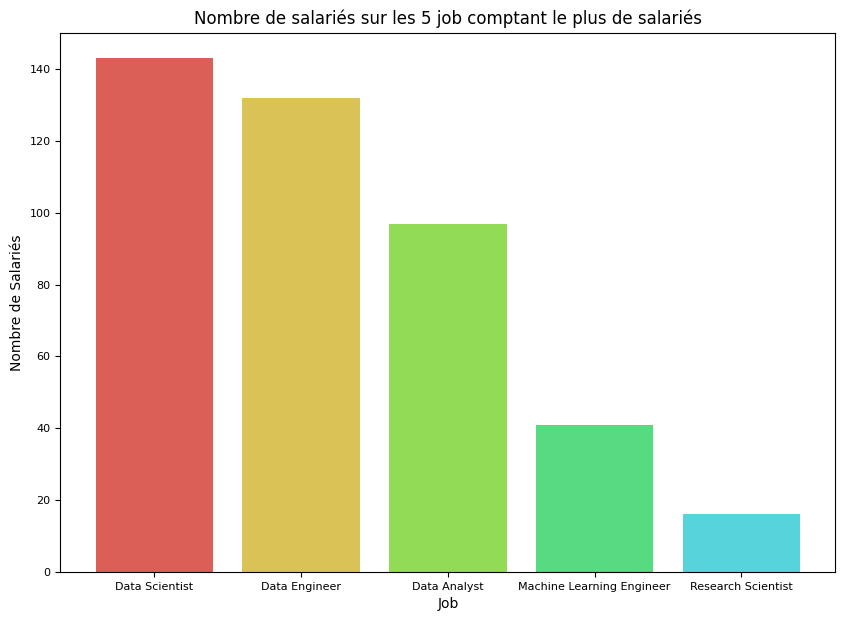

In [10]:
job_x = df["job_title"].value_counts()
sorted_job = sorted(job_x, reverse= True)
top_5_job = sorted_job[:5]
name = ["Data Scientist", "Data Engineer", "Data Analyst", "Machine Learning Engineer", "Research Scientist"]
colors = sns.color_palette("hls", 8)


fig, ax = plt.subplots(figsize = (10, 7))

ax.bar(name, top_5_job, color = colors)

ax.set_title("Nombre de salariés sur les 5 job comptant le plus de salariés")
ax.set_ylabel("Nombre de Salariés")
ax.set_xlabel("Job")
plt.tick_params(axis = 'both', labelsize = 8)

plt.show()

In [14]:
df_pays = pd.read_csv('pays.csv')
df_monnaie = pd.read_csv('codes_salaires.csv')
df_monnaie=df_monnaie.drop(['Entity','NumericCode','MinorUnit','WithdrawalDate'],axis=1)

In [15]:
df = df.merge(df_pays, how='inner', left_on='company_location', right_on='Code').drop(['Code','company_location'], axis=1).rename(columns={'Name': 'Company_location'})
df = df.merge(df_pays, how='inner', left_on='employee_residence', right_on='Code').drop(['Code','employee_residence'], axis=1).rename(columns={'Name': 'employee_residence'})
df = df.drop(['salary','salary_currency'], axis=1)

In [16]:
mapping_dict = {'FT': 'full time', 'PT': 'part time', 'CT': 'Contract', 'FL': 'Freelance'}
df['employment_type'] = df['employment_type'].replace(mapping_dict)

mapping_dict = {'EN': 'Junior', 'MI': 'Intermediate', 'SE': 'Expert', 'EX': 'Director'}
df['experience_level'] = df['experience_level'].replace(mapping_dict)

# EDA Tristan

# EDA Camille

In [4]:
# dimension of dataset
df.shape

(607, 12)

In [5]:
# statistics summary
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
# features informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
# feature Unnamed rename ID
df.rename(columns={'Unnamed: 0': 'ID',}, inplace=True)

In [8]:
#Dataframe numerics
df_num = df[["ID","work_year","salary","salary_in_usd","remote_ratio"]]
df_num

,ID,work_year,salary,salary_in_usd,remote_ratio
0,0,2020,70000,79833,0
1,1,2020,260000,260000,0
2,2,2020,85000,109024,50
3,3,2020,20000,20000,0
4,4,2020,150000,150000,50
...,...,...,...,...,...
602,602,2022,154000,154000,100
603,603,2022,126000,126000,100
604,604,2022,129000,129000,0
605,605,2022,150000,150000,100


In [9]:
#Dataframe categories
df_categories = df[["experience_level","employment_type","job_title","salary_currency","employee_residence","company_location", "company_size"]]
df_categories

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
0,MI,FT,Data Scientist,EUR,DE,DE,L
1,SE,FT,Machine Learning Scientist,USD,JP,JP,S
2,SE,FT,Big Data Engineer,GBP,GB,GB,M
3,MI,FT,Product Data Analyst,USD,HN,HN,S
4,SE,FT,Machine Learning Engineer,USD,US,US,L
...,...,...,...,...,...,...,...
602,SE,FT,Data Engineer,USD,US,US,M
603,SE,FT,Data Engineer,USD,US,US,M
604,SE,FT,Data Analyst,USD,US,US,M
605,SE,FT,Data Analyst,USD,US,US,M


In [17]:
df

,ID,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Company_location,employee_residence
0,0,2020,Intermediate,full time,Data Scientist,79833,0,L,Germany,Germany
1,30,2020,Intermediate,full time,Data Engineering Manager,59303,100,S,Germany,Germany
2,45,2020,Junior,part time,ML Engineer,15966,100,S,Germany,Germany
3,55,2020,Expert,full time,Principal Data Scientist,148261,100,M,Germany,Germany
4,65,2020,Junior,full time,Data Scientist,62726,50,S,Germany,Germany
...,...,...,...,...,...,...,...,...,...,...
602,501,2022,Intermediate,full time,Head of Data,32974,100,S,Estonia,Estonia
603,503,2022,Intermediate,full time,Machine Learning Engineer,87425,100,L,Australia,Australia
604,505,2022,Junior,full time,Data Scientist,86703,50,M,Australia,Australia
605,510,2022,Junior,full time,Computer Vision Software Engineer,150000,100,S,Australia,Australia


In [33]:
# Top 5 métiers
df_top5 = df.loc[(df['job_title']=="Data Scientist")|(df['job_title']== "Data Engineer")|(df['job_title']=="Data Analyst")|(df['job_title']=="Machine Learning Engineer")|(df['job_title']== "Research Scientist")]

In [88]:
# Top 3 métiers
df_top3 = df.loc[(df['job_title']=="Data Scientist")|(df['job_title']== "Data Engineer")|(df['job_title']=="Data Analyst")]

<AxesSubplot:xlabel='salary_in_usd', ylabel='job_title'>

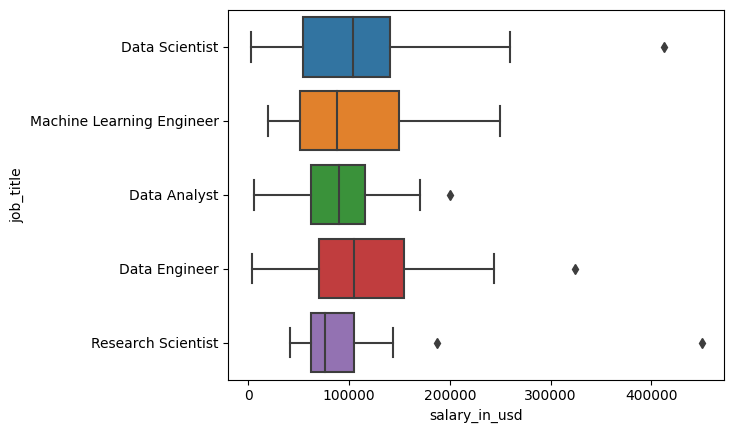

In [23]:
# Boxplot des salaraires par top 5 métiers
sns.boxplot(data=df_top5, x="salary_in_usd", y="job_title")

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

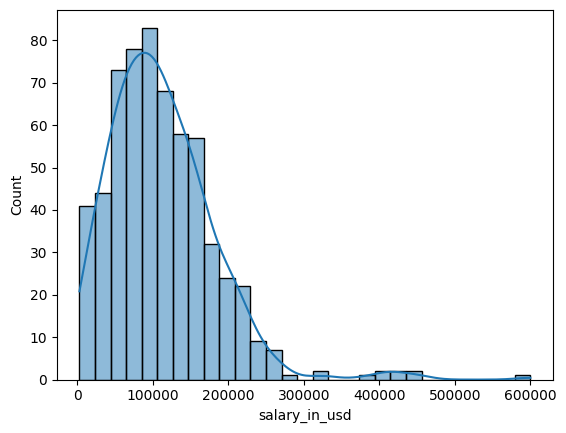

In [24]:
# Salaire global
sns.histplot(data=df, x="salary_in_usd", kde=True)

In [46]:
df_compagny = df["Company_location"].value_counts().sum
df_compagny

<bound method NDFrame._add_numeric_operations.<locals>.sum of United States                355
United Kingdom                47
Canada                        30
Germany                       28
India                         24
France                        15
Spain                         14
Greece                        11
Japan                          6
Netherlands                    4
Poland                         4
Portugal                       4
Austria                        4
Turkey                         3
Pakistan                       3
Australia                      3
Denmark                        3
Luxembourg                     3
Mexico                         3
Brazil                         3
United Arab Emirates           3
China                          2
Slovenia                       2
Belgium                        2
Nigeria                        2
Czech Republic                 2
Italy                          2
Switzerland                    2
Russian Federa

In [70]:
# Top 5 entreprises
df_top5_compagny = df.loc[(df['Company_location']=="United Kingdom")|(df['Company_location']== "Canada")|(df['Company_location']=="Germany")|(df['Company_location']=="India")|(df['Company_location']=="France")]

<AxesSubplot:xlabel='Company_location', ylabel='salary_in_usd'>

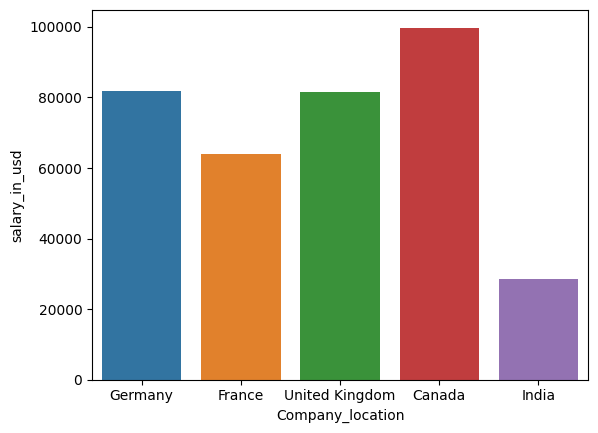

In [71]:
# Top 5 compagnies by salaries
sns.barplot(data=df_top5_compagny, x="Company_location", y="salary_in_usd", ci=None)

<AxesSubplot:xlabel='experience_level', ylabel='count'>

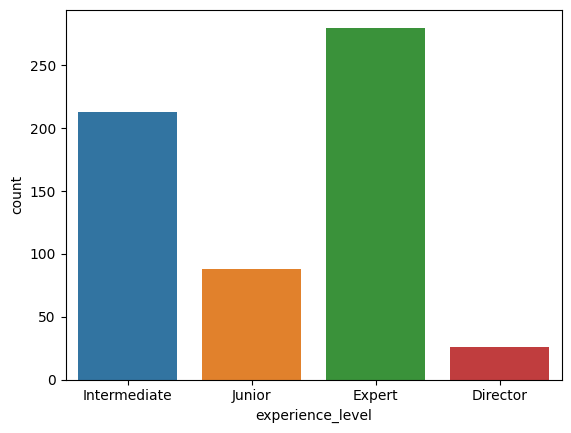

In [74]:
# Count of Experience_level
sns.countplot(data=df, x="experience_level")

<AxesSubplot:xlabel='Company_location', ylabel='count'>

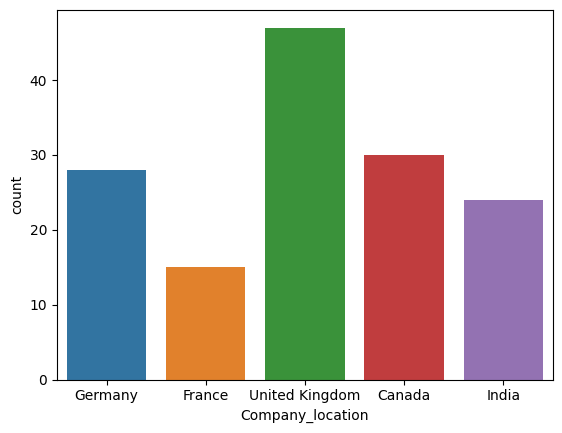

In [73]:
# Count of compagny_location
sns.countplot(data=df_top5_compagny, x="Company_location")

<AxesSubplot:xlabel='Company_location', ylabel='count'>

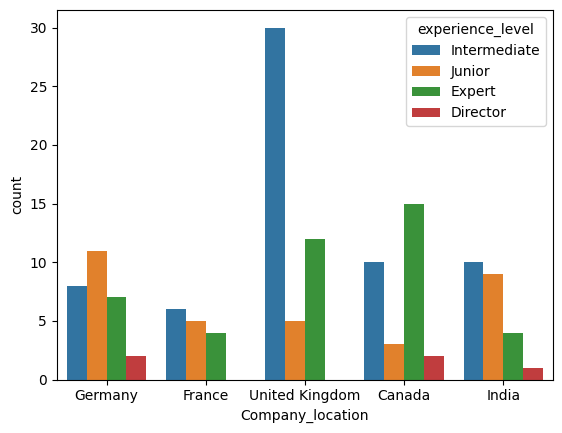

In [82]:
# Count of experience_level by compagny_location
sns.countplot(data=df_top5_compagny, x="Company_location", hue="experience_level")

<AxesSubplot:xlabel='Company_location', ylabel='count'>

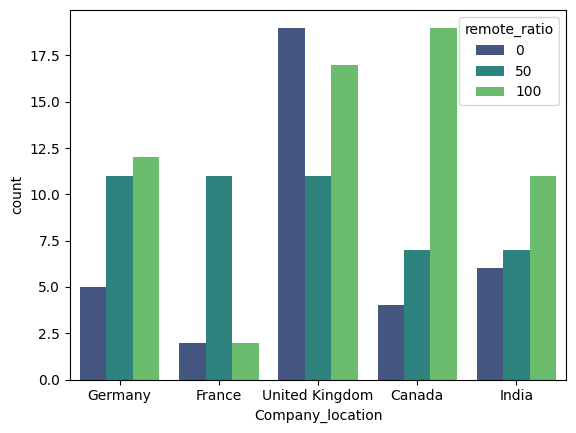

In [96]:
# Count of remote_ratio by compagny_location
sns.countplot(data=df_top5_compagny, x="Company_location", hue="remote_ratio", palette = 'viridis')

<AxesSubplot:xlabel='job_title', ylabel='salary_in_usd'>

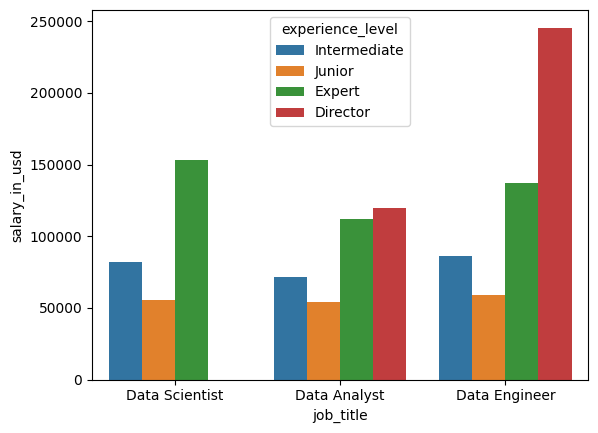

In [91]:
# Top 3 metiers en fonction du nombre de different experience_level
sns.barplot(data=df_top3, x="job_title", y="salary_in_usd", hue="experience_level", ci=None)

<AxesSubplot:xlabel='salary_in_usd', ylabel='Count'>

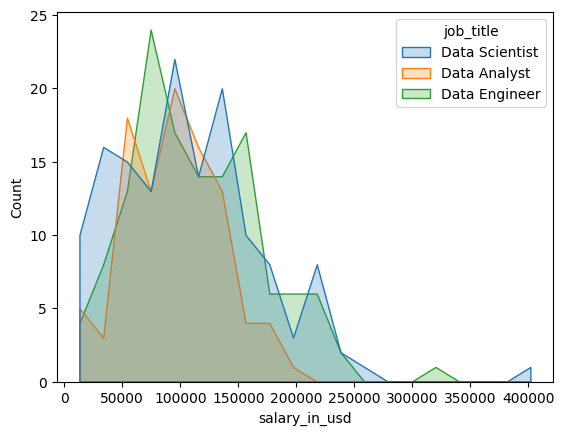

In [38]:
# Salaires en fonction du top 3 métiers
sns.histplot(data=df_top3, x="salary_in_usd", hue="job_title", element="poly")

In [ ]:
salary by experience_level(job_title)

In [40]:
df

,ID,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Company_location,employee_residence
0,0,2020,Intermediate,full time,Data Scientist,79833,0,L,Germany,Germany
1,30,2020,Intermediate,full time,Data Engineering Manager,59303,100,S,Germany,Germany
2,45,2020,Junior,part time,ML Engineer,15966,100,S,Germany,Germany
3,55,2020,Expert,full time,Principal Data Scientist,148261,100,M,Germany,Germany
4,65,2020,Junior,full time,Data Scientist,62726,50,S,Germany,Germany
...,...,...,...,...,...,...,...,...,...,...
602,501,2022,Intermediate,full time,Head of Data,32974,100,S,Estonia,Estonia
603,503,2022,Intermediate,full time,Machine Learning Engineer,87425,100,L,Australia,Australia
604,505,2022,Junior,full time,Data Scientist,86703,50,M,Australia,Australia
605,510,2022,Junior,full time,Computer Vision Software Engineer,150000,100,S,Australia,Australia


In [37]:
df.head(3)

,ID,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_size,Company_location,employee_residence
0,0,2020,Intermediate,full time,Data Scientist,79833,0,L,Germany,Germany
1,30,2020,Intermediate,full time,Data Engineering Manager,59303,100,S,Germany,Germany
2,45,2020,Junior,part time,ML Engineer,15966,100,S,Germany,Germany


# EDA Selmane